# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
## Settings
# Automatically update the imported modules from the python scripts
%load_ext autoreload
%autoreload 2
from __future__ import absolute_import

# Import python libraries
from P1703031502_ImportLibraries import * # see footnote, [1]
import prettyplotlib as ppl
import brewer2mpl
assert tf.__version__ == '1.0.0', 'You need at least TensorFlow 1.0.0'
%matplotlib inline

# directories location
#pathData = '/home/mo/_eSDC_/_L11_/_V2_/_2_WIP/_DATA_/'
pathData = '/home/mo/_eSDC_/_L11_/_V2_/_1_WORK/_2_WIP/_DATA_/'

# Activate or not the traces
tRace1, tRace2, tRace3 = True, False, False
msg1, msg2, msg3       = '...DONE'+' '+datetime.now().strftime("%y%m%dx%H%M"),'< You are here >', '< ? >'

if tRace1: print(msg1)

...DONE 170307x1944


In [2]:
# Load pickled data
#import pickle

# TODO: Fill this in based on where you saved the training and testing data
path = pathData+'traffic-signs-data/'
training_file   = path+'train.p'
validation_file = path+'valid.p'
testing_file    = path+'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

if tRace1: print(msg1)

...DONE 170307x1944


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
#import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validing examples =", n_valid)
print("Number of testing examples  =", n_test)
print("Image data shape  =", image_shape)
print("Number of classes =", n_classes)

print()
if tRace1: print(msg1)

Number of training examples = 34799
Number of validing examples = 4410
Number of testing examples  = 12630
Image data shape  = (32, 32, 3)
Number of classes = 43

...DONE 170307x1944


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [ ]:
def ocrLabel(dataSet, csvFile='signnames.csv'):
    n_classes = len(np.unique(dataSet))
    # Map class_id with Traffic-sign names: dct[classId] = Traffic-sign names
    with open(csvFile, newline='', encoding="utf8") as csvFile1:
        read0 = csv.reader(csvFile1)
        #dct0, dct1, dct2 = {}, {}, {}
        dct0, dct1 = {}, {}
        for i in read0:
            try:
                dct0[int(i[0])] = i[1]
            except:
                pass
    # Output : dct[classId] = Traffic-sign names


    # Occurence by class id: dct[classId] = occurence
    ocr, classId = np.histogram(dataSet, np.arange(n_classes+1))
    classId = classId[:-1].copy()
    for i,j in zip(classId,ocr):
            dct1[i] = j
    # Output : dct[classId] = occurence


    # Occurence by Traffic-sign names: dct[Traffic-sign names] = occurence
    lt = []
    for i in classId:
            lt.append([dct1[i], dct0[i]])
    # Output : lt[classId] = [occurence, Traffic-sign names] 

    return lt

if tRace1: print(msg1)

In [20]:
class dataExplo(object):
    def __init__(self, dataSet, csvFile='signnames.csv', sOrted=False):
        self.dataSet   = dataSet
        self.csvFile   = csvFile
        self.sOrted    = sOrted


    def showChart(self,figNb=1):
        '''Show the number of occurence per class'''
        n_classes = len(np.unique(self.dataSet))
        set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors # [2] Get "Set2" colors from ColorBrewer
        hist, bins = np.histogram(self.dataSet, np.arange(n_classes+1))
        fig = plt.figure(figsize=(16, 3))

        plt.title('fig.'+str(figNb)+': labels - number of occurence per class')
        plt.xlabel('Class id')
        plt.ylabel('Number of occurence')
        plt.xlim(0,n_classes)
        plt.ylim(0,np.amax(hist))
        ax = fig.add_subplot(111)
        ppl.bar(ax, bins[:-1], hist, grid='y', color='#616161')
     

    def showDist(self,figNb=2):
        n_classes = len(np.unique(self.dataSet))
        set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
        axX = np.arange(len(self.dataSet))
        axY = self.dataSet
        fig = plt.figure(figsize=(16,2))

        plt.title('fig.'+str(figNb)+': labels - data distribution')
        plt.xlabel('Index')
        plt.ylabel('Class id')
        plt.ylim(0,n_classes)
        ax = fig.add_subplot(111)    
        plt.plot(axX,axY,".", color=set2[7])
        #ax.scatter(axX, axY, color=set2[7])
          

    def showList(self,figNb=3):
        dt1 = { 0: '----------------------------------------------',
                1: '{:47}',
                2: '{:47}',
                3: '{:40}',
                4: '|{:4}'
                }

        dt2 = {10: 'Traffic sign name',
               11: 'Qty',
               }


        if self.sOrted:
            sTr = 'sorted'
        else:
            sTr = ''
        print('fig.'+str(figNb)+': labels - {} List of occurence per Traffic sign name'.format(sTr))
        
        # Print the table header
        print(dt1[1].format(dt1[0]), dt1[1].format(dt1[0]))
        print(dt1[3].format(dt2[10]), dt1[4].format(dt2[11])\
              +'  '+dt1[3].format(dt2[10]), dt1[4].format(dt2[11]))
        print(dt1[1].format(dt1[0]), dt1[1].format(dt1[0]))

        # Print ( the Traffic sign name and the related occurence ) x 2 / line
        if self.sOrted:
            lt = sorted(self.ocrLabel(), reverse=True)
        else:
            lt = ocrLabel(self.dataSet)

        nbLine = int(len(lt)/2)
        rem    = len(lt)%2
        for i in range(nbLine):
            print(dt1[3].format(lt[i][1][:40]), dt1[4].format(lt[i][0])\
                  +'  '+dt1[3].format(lt[i+nbLine][1][:40]), dt1[4].format(lt[i+nbLine][0]))
        if rem !=0:
            print(dt1[3].format(''), dt1[4].format('')\
                  +'  '+dt1[3].format(lt[-1][1][:40]), dt1[4].format(lt[-1][0]))



    def __str__(self): # footnote [3]
        import inspect
        frame = inspect.currentframe()
        var_id = id(self.dataSet)
        for name in frame.f_back.f_locals.keys():
            try:
                if id(eval(name)) == var_id:
                    return '< dataExplo''('' ' + name + ' '')'' >'                    
            except:
                return '< dataEplo''('' ? '')'' >'


if tRace1: print(msg1)

...DONE 170307x1944


< dataExplo( y_train ) >
fig.1: labels -  List of occurence per Traffic sign name
----------------------------------------------  ---------------------------------------------- 
Traffic sign name                        |Qty   Traffic sign name                        |Qty 
----------------------------------------------  ---------------------------------------------- 
Speed limit (20km/h)                     | 180  Double curve                             | 270
Speed limit (30km/h)                     |1980  Bumpy road                               | 330
Speed limit (50km/h)                     |2010  Slippery road                            | 450
Speed limit (60km/h)                     |1260  Road narrows on the right                | 240
Speed limit (70km/h)                     |1770  Road work                                |1350
Speed limit (80km/h)                     |1650  Traffic signals                          | 540
End of speed limit (80km/h)              | 360  Pedestrians  

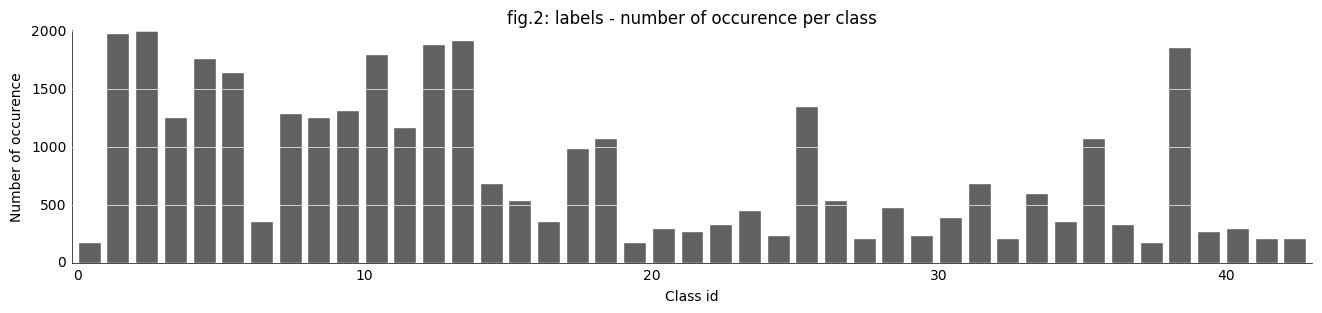

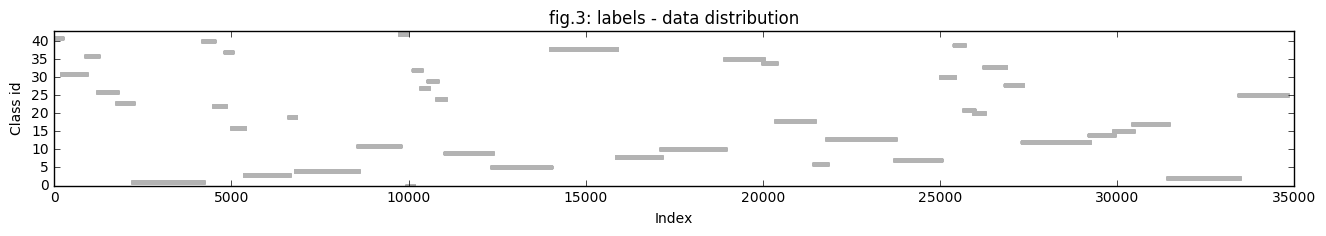

In [22]:
yT_explo = dataExplo(y_train)
print(yT_explo)
yT_explo.showList(1)
yT_explo.showChart(2)
yT_explo.showDist(3)


___

In [23]:
def showSprite(dataSet1, dataSet2, path, cmap=None, imgFileFormat='png', tRace2=None):
    ## Create a blank sprite image
    #-1/ Import libraries
    import PIL
    from PIL import Image
    
    # 0/ Retrieve the name of dataSet1
    import inspect
    frame = inspect.currentframe()
    var_id = id(dataSet1)
    for name in frame.f_back.f_locals.keys():
        try:
            if id(eval(name)) == var_id:
                outputName = name                   
        except:
            outputName = 'None' 
    outputName = '_sp'+outputName
    lt=[]
    
    #1-Retrieve the width and the height of image input
    image_width, image_height = dataSet1.shape[1], dataSet1.shape[2]

    #2-Compute the width and the height of the sprite image
    dIm = len(dataSet1)**0.5
    dIm = int(dIm) + (dIm - int(dIm) > 0)
    pxSprite = dIm*image_width
    master_width, master_height = pxSprite, pxSprite
    outputName = outputName+'_{}x{}'.format(master_width, master_height)
    if tRace2: print ('The sprite image name is {}.{}'.format(outputName,imgFileFormat))

    #3-Create a blank sprite image
    master = Image.new(mode='RGBA', size=(master_width, master_height), color=(0,0,0,0))
    if tRace2: print ("The blank sprite image is {}x{}".format(master_width, master_height))

    ## Create and save the sprite image
    count = 0
    for y in range(dIm):
        for x in range(dIm):
            try:
                image  = Image.fromarray(dataSet1[count],'RGB')
                lt.append(dataSet2[count])
            except:
                image  = Image.new(mode='RGB', size=(master_width, master_height), color=0)
                lt.append(99)
            finally:                
                if tRace2: print('adding image {}'.format(count+1),' at location {}'.format((x,y)))
                master.paste(image,(x*image_width,y*image_height))
                image.close()
                count+= 1
                
    spriteImg = path+outputName+'.'+imgFileFormat
    master.save(spriteImg) #, transparency=0 )
    if tRace2: print('{}.{} has been created and saved').format(outputName, imgFileFormat)
    
    spriteLbl = path+outputName+'.tsv'
    np.savetxt(spriteLbl, lt, '%1i')
    if tRace2: print('{}.{} has been created and saved').format(outputName, '.tsv')
    
    return spriteImg, master

if tRace1: print(msg1)

...DONE 170307x1944


...DONE 170307x1944


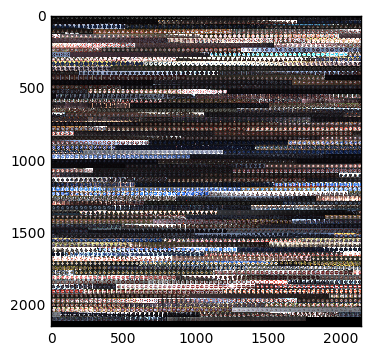

In [24]:
imgPath = '/home/mo/_eSDC_/_L11_/_V2_/_1_WORK/_2_WIP/_DATA_/_TF_/'
imgName, image = showSprite(X_valid, y_valid, imgPath)

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
imshow(np.asarray(image))

if tRace1:print(msg1)

___

In [45]:
def locateTS(dataSet):
    lt0 = ocrLabel(dataSet)
    lt1 = []
    count = 0

    for i in lt0:
        lt1.append([i[1],[0+count,count+i[0]-1]])
        count = lt1[-1][1][1]+1
    
    return lt1
    
if tRace1:print(msg1)

...DONE 170307x1944


In [63]:
def showMosaic(dataImg, dataLabel, nbr=43, cmap=None):
    # Get list = [ TS Name, [indexMin , indexMax] ]
    lt0 = locateTS(dataLabel)
    
    # Compute the width and the height of the sprite image
    dIm = nbr**0.5
    dIm = int(dIm) + (dIm - int(dIm) > 0)
    master_width, master_height = dIm*3, dIm*3
    gs1 = gridspec.GridSpec(master_width, master_height)
    gs1.update(left=0, right=0.5, hspace=0.05, wspace=0.05)
    
    # Create and save the sprite image
    count = 0
    for y0 in range(dIm):
        y = y0*3
        for x0 in range(dIm):
            x = x0*3
            lt1 = [ [0+x,y+0], [0+x,y+2], [1+x,y+2], [2+x,y+2], [2+x,y+1], [2+x,y+0] ]
            flag = True
            
            if count+1 <= nbr:
                for i in lt1:
                    if flag:
                        ax = plt.subplot(gs1[0+x:x+2,0+y:y+2])            
                        flag = False
                    else:
                        ax = plt.subplot(gs1[i[0],i[1]])
                    index = random.randint(lt0[count][1][0], lt0[count][1][1])          
                    image = dataImg[index]
                    ax.imshow(image, cmap=cmap)
                    ax.set_xticks([]); ax.set_yticks([])
            else:
                ax = plt.subplot(gs1[x,y])
                ax.set_xticks([]); ax.set_yticks([])
                ax.axis('off')

            count += 1

if tRace1:print(msg1)

...DONE 170307x1944


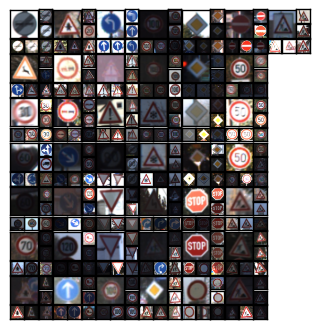

In [64]:
showMosaic(X_train, y_train)

___

In [ ]:
def tsRange(lt):
    '''
    Description:
        - it returns a list of list given the localization of each Traffic Sign in the data set
    Input:
        - hist0 has to be generated first from LabelOccu()
    Ouput:
        - lt0 : a list (len=43)  of list (len=2).
                The master list contents 43 lists, one per class of Traffic sign.
                The child list contents two X_train's indexes:
                    _ the first index is about the first Traffic Sign of the related class,
                    _ and the 2nd one for the latest Traffic Sign of the related class.
    '''
    valInf = 0
    lt0 = []
    for i in lt:
        lt0.append([valInf , valInf + (i-1)])
        valInf = valInf + i
    return lt0

___

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

___
![PROBLEM](https://financesonline.com/uploads/2016/04/sol.gif)
## PROBLEM

[ISSUE] <-- GitHub : abstract

[1] To save & run Python script in Jupyter Notebook   
http://stackoverflow.com/questions/33084936/want-to-save-run-python-script-in-jupyter-notebook-anaconda   
[2] All colorbrewer scales   
http://bl.ocks.org/mbostock/5577023   
[3] How to get a variable name as a string in Python?   
http://stackoverflow.com/questions/2553354/how-to-get-a-variable-name-as-a-string-in-python

___
![BIBLIOGRAPHY](http://www.formatgenerator.com/wp-content/uploads/2014/05/APA-Annotated-Bibliography-Maker-520x245.jpg)
## BIBLIOGRAPHY

[J1] To save & run Python script in Jupyter Notebook   
http://stackoverflow.com/questions/33084936/want-to-save-run-python-script-in-jupyter-notebook-anaconda   
[J2] All colorbrewer scales   
http://bl.ocks.org/mbostock/5577023   
[J3] How to get a variable name as a string in Python?   
http://stackoverflow.com/questions/2553354/how-to-get-a-variable-name-as-a-string-in-python    
[J4] Using % and .format() for great good   
https://pyformat.info/   
[J5] Customizing Location of Subplot Using GridSpec   
http://matplotlib.org/1.4.0/users/gridspec.html   
[J6] How to return a contiguous flattened array   
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html   
https://docs.scipy.org/doc/numpy/reference/generated/numpy.flatiter.html   
[J7] Image Module | PIL.Image.fromarray(obj, mode=None)   
http://pillow.readthedocs.io/en/3.1.x/reference/Image.html

[G1] How to undo 'git add' before commit   
http://stackoverflow.com/questions/348170/how-to-undo-git-add-before-commit   
[G2] How to remove a directory from git repository   
http://stackoverflow.com/questions/6313126/how-to-remove-a-directory-from-git-repository   
[G3] How to remove settings: git config global file    
http://askubuntu.com/questions/206449/git-config-global-file-remove-settings   
[G4] How to make Sublime Text the default editor for Git     
https://help.github.com/articles/associating-text-editors-with-git/   
[G5] How to Write a Git Commit Message   
https://chris.beams.io/posts/git-commit/   
https://git-scm.com/book/en/v2/Distributed-Git-Contributing-to-a-Project   

___
![GARBAGE](http://www.salubritatedeva.ro/comune/web/photo/6_3.jpg)
## GARBAGE

In [ ]:
def IndexList(dataImg, tRace=False):
    '''Create a shuffled list of index'''
    n_occu = len(dataImg)
    lt     = [i for i in range(n_occu)]
    lt     = shuffle(lt)
    if tRace: print(lt[:15])
    return lt    
ltTmp = IndexList(X_train)
if tRace1: print(msg1)

In [ ]:
def showMosaic(dataSubset, cmap=None):
    lt = [ (3,3), (0,0), (0,2), (1,2), (2,2), (2,1), (2,0) ]
    count = 0
    
    for i in lt[1:]:
        if i == (0,0):
            ax = plt.subplot2grid(lt[0], i, rowspan=2, colspan=2)
        else:
            ax = plt.subplot2grid(lt[0], i)
            
        image = dataSubset[count]
        ax.imshow(image, cmap=cmap)
        ax.set_xticks([]); ax.set_yticks([])
        count += 1
        
showMosaic(X_train[:6])

In [ ]:
def showSprite(dataSet1, dataSet2, path, cmap=None, imgFileFormat='png', tRace2=None):
    ## Create a blank sprite image
    #-1/ Import libraries
    import PIL
    from PIL import Image
    
    # 0/ Retrieve the name of dataSet1
    import inspect
    frame = inspect.currentframe()
    var_id = id(dataSet1)
    for name in frame.f_back.f_locals.keys():
        try:
            if id(eval(name)) == var_id:
                outputName = name                   
        except:
            outputName = 'None' 
    outputName = '_sp'+outputName
    lt=[]
    
    #1-Retrieve the width and the height of image input
    image_width, image_height = dataSet1.shape[1], dataSet1.shape[2]

    #2-Compute the width and the height of the sprite image
    dIm = len(dataSet1)**0.5
    dIm = int(dIm) + (dIm - int(dIm) > 0)
    pxSprite = dIm*image_width
    master_width, master_height = pxSprite, pxSprite
    outputName = outputName+'_{}x{}'.format(master_width, master_height)
    if tRace2: print ('The sprite image name is {}.{}'.format(outputName,imgFileFormat))

    #3-Create a blank sprite image
    master = Image.new(mode='RGBA', size=(master_width, master_height), color=(0,0,0,0))
    if tRace2: print ("The blank sprite image is {}x{}".format(master_width, master_height))

    ## Create and save the sprite image
    count = 0
    for y in range(dIm):
        for x in range(dIm):
            try:
                image  = Image.fromarray(dataSet1[count],'RGB')
                lt.append(dataSet2[count])
            except:
                image  = Image.new(mode='RGB', size=(master_width, master_height), color=0)
                lt.append(99)
            finally:                
                if tRace2: print('adding image {}'.format(count+1),' at location {}'.format((x,y)))
                master.paste(image,(x*image_width,y*image_height))
                image.close()
                count+= 1
                
    spImg = outputName+'.'+imgFileFormat
    master.save(path+spImg) #, transparency=0 )
    if tRace2: print('{}.{} has been created and saved').format(outputName, imgFileFormat)
    
    np.savetxt(outputName+'.tsv', lt, '%1i')
    if tRace2: print('{}.{} has been created and saved').format(outputName, '.tsv')
    
    return spriteImg, master

if tRace1: print(msg1)

In [ ]:
def showSprite(dataSet1, dataSet2, path, cmap=None, imgFileFormat='png', tRace2=None):
    ## Create a blank sprite image
    #-1/ Import libraries
    import PIL
    from PIL import Image
    
    # 0/ Retrieve the name of dataSet1
    import inspect
    frame = inspect.currentframe()
    var_id = id(dataSet1)
    for name in frame.f_back.f_locals.keys():
        try:
            if id(eval(name)) == var_id:
                outputName = name                   
        except:
            outputName = 'None' 
    outputName = '_sp'+outputName
    lt=[]
    
    #1-Retrieve the width and the height of image input
    image_width, image_height = dataSet1.shape[1], dataSet1.shape[2]

    #2-Compute the width and the height of the sprite image
    dIm = len(dataSet1)**0.5
    dIm = int(dIm) + (dIm - int(dIm) > 0)
    pxSprite = dIm*image_width
    master_width, master_height = pxSprite, pxSprite
    outputName = outputName+'_{}x{}'.format(master_width, master_height)
    if tRace2: print ('The sprite image name is {}.{}'.format(outputName,imgFileFormat))

    #3-Create a blank sprite image
    master = Image.new(mode='RGBA', size=(master_width, master_height), color=(0,0,0,0))
    if tRace2: print ("The blank sprite image is {}x{}".format(master_width, master_height))

    ## Create and save the sprite image
    count = 0
    for y in range(dIm):
        for x in range(dIm):
            try:
                image  = Image.fromarray(dataSet1[count],'RGB')
                lt.append(dataSet2[count])
            except:
                image  = Image.new(mode='RGB', size=(master_width, master_height), color=0)
                lt.append(99)
            finally:                
                if tRace2: print('adding image {}'.format(count+1),' at location {}'.format((x,y)))
                master.paste(image,(x*image_width,y*image_height))
                image.close()
                count+= 1
                
    spImg = outputName+'.'+imgFileFormat
    master.save(path+spImg) #, transparency=0 )
    if tRace2: print('{}.{} has been created and saved').format(outputName, imgFileFormat)
    
    np.savetxt(outputName+'.tsv', lt, '%1i')
    if tRace2: print('{}.{} has been created and saved').format(outputName, '.tsv')
    
    return spImg, master

if tRace1: print(msg1)

In [ ]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))
# Remove ticks from the plot.
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])


In [ ]:
nbr = 43
xDim, yDim = 7,7
aRea = 0

gs = gridspec.GridSpec(xDim, yDim)
for i in range(yDim):
    for j in range(xDim):
        aRea += 1
        if aRea <= nbr:
            axes = plt.subplot(gs[i,j])
            axes.set_xticks([])
            axes.set_yticks([])
        else:
            axes = plt.subplot(gs[i,j])
            axes.axis('off')

In [ ]:
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=0.5, hspace=0.05, wspace=0.05)
ax1 = plt.subplot(gs1[0:2,0:2])
ax1.imshow(image, cmap=None)

ax2 = plt.subplot(gs1[2, 0])
ax2.imshow(X_train[2], cmap=None)

ax3 = plt.subplot(gs1[2, 1])
ax3.imshow(X_train[3], cmap=None)

ax4 = plt.subplot(gs1[0,2])
ax4.imshow(X_train[4], cmap=None)

ax5 = plt.subplot(gs1[1,2])
ax5.imshow(X_train[5], cmap=None)

ax6 = plt.subplot(gs1[2,2])
ax6.imshow(X_train[6], cmap=None)


ax1.set_xticks([]); ax1.set_yticks([])
ax2.set_xticks([]); ax2.set_yticks([])
ax3.set_xticks([]); ax3.set_yticks([])
ax4.set_xticks([]); ax4.set_yticks([])
ax5.set_xticks([]); ax5.set_yticks([])
ax6.set_xticks([]); ax6.set_yticks([])

In [ ]:
ax1 = plt.subplot2grid((3,3), (0,0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid((3,3), (0,2))
ax3 = plt.subplot2grid((3,3), (1,2))
ax4 = plt.subplot2grid((3,3), (2,2))
ax5 = plt.subplot2grid((3,3), (2,1))
ax6 = plt.subplot2grid((3,3), (2,0))

# Remove ticks from the plot.
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])

In [ ]:
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,2],
                       height_ratios=[4,1]
                       )

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

In [11]:
class dataExplo(object):
    def __init__(self, dataSet, csvFile='signnames.csv', sOrted=False):
        self.dataSet   = dataSet
        self.csvFile   = csvFile
        self.sOrted    = sOrted


    def showChart(self,figNb=1):
        '''Show the number of occurence per class'''
        n_classes = len(np.unique(self.dataSet))
        set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors # [2] Get "Set2" colors from ColorBrewer
        hist, bins = np.histogram(self.dataSet, np.arange(n_classes+1))
        fig = plt.figure(figsize=(16, 3))

        plt.title('fig.'+str(figNb)+': labels - number of occurence per class')
        plt.xlabel('Class id')
        plt.ylabel('Number of occurence')
        plt.xlim(0,n_classes)
        plt.ylim(0,np.amax(hist))
        ax = fig.add_subplot(111)
        ppl.bar(ax, bins[:-1], hist, grid='y', color='#616161')
     

    def showDist(self,figNb=2):
        n_classes = len(np.unique(self.dataSet))
        set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
        axX = np.arange(len(self.dataSet))
        axY = self.dataSet
        fig = plt.figure(figsize=(16,2))

        plt.title('fig.'+str(figNb)+': labels - data distribution')
        plt.xlabel('Index')
        plt.ylabel('Class id')
        plt.ylim(0,n_classes)
        ax = fig.add_subplot(111)    
        plt.plot(axX,axY,".", color=set2[7])
        #ax.scatter(axX, axY, color=set2[7])
        

    def ocrLabel(self):
        n_classes = len(np.unique(self.dataSet))
        # Map class_id with Traffic-sign names: dct[classId] = Traffic-sign names
        with open(self.csvFile, newline='', encoding="utf8") as csvFile1:
            read0 = csv.reader(csvFile1)
            #dct0, dct1, dct2 = {}, {}, {}
            dct0, dct1 = {}, {}
            for i in read0:
                try:
                    dct0[int(i[0])] = i[1]
                except:
                    pass
        # Output : dct[classId] = Traffic-sign names


        # Occurence by class id: dct[classId] = occurence
        ocr, classId = np.histogram(self.dataSet, np.arange(n_classes+1))
        classId = classId[:-1].copy()
        for i,j in zip(classId,ocr):
                dct1[i] = j
        # Output : dct[classId] = occurence


        # Occurence by Traffic-sign names: dct[Traffic-sign names] = occurence
        lt = []
        for i in classId:
                lt.append([dct1[i], dct0[i]])
        # Output : lt[classId] = [occurence, Traffic-sign names] 

        return lt
    

    def showList(self,figNb=3):
        dt1 = { 0: '----------------------------------------------',
                1: '{:47}',
                2: '{:47}',
                3: '{:40}',
                4: '|{:4}'
                }

        dt2 = {10: 'Traffic sign name',
               11: 'Qty',
               }


        if self.sOrted:
            sTr = 'sorted'
        else:
            sTr = ''
        print('fig.'+str(figNb)+': labels - {} List of occurence per Traffic sign name'.format(sTr))
        
        # Print the table header
        print(dt1[1].format(dt1[0]), dt1[1].format(dt1[0]))
        print(dt1[3].format(dt2[10]), dt1[4].format(dt2[11])\
              +'  '+dt1[3].format(dt2[10]), dt1[4].format(dt2[11]))
        print(dt1[1].format(dt1[0]), dt1[1].format(dt1[0]))

        # Print ( the Traffic sign name and the related occurence ) x 2 / line
        if self.sOrted:
            lt = sorted(self.ocrLabel(), reverse=True)
        else:
            lt = ocrLabel(self.dataSet)

        nbLine = int(len(lt)/2)
        rem    = len(lt)%2
        for i in range(nbLine):
            print(dt1[3].format(lt[i][1][:40]), dt1[4].format(lt[i][0])\
                  +'  '+dt1[3].format(lt[i+nbLine][1][:40]), dt1[4].format(lt[i+nbLine][0]))
        if rem !=0:
            print(dt1[3].format(''), dt1[4].format('')\
                  +'  '+dt1[3].format(lt[-1][1][:40]), dt1[4].format(lt[-1][0]))



    def __str__(self): # footnote [3]
        import inspect
        frame = inspect.currentframe()
        var_id = id(self.dataSet)
        for name in frame.f_back.f_locals.keys():
            try:
                if id(eval(name)) == var_id:
                    return '< dataExplo''('' ' + name + ' '')'' >'                    
            except:
                return '< dataEplo''('' ? '')'' >'


if tRace1: print(msg1)

...DONE 170307x1944


In [53]:
nbr = 43
dIm = nbr**0.5
dIm = int(dIm) + (dIm - int(dIm) > 0)
master_width, master_height = dIm*3, dIm*3
gs1 = gridspec.GridSpec(master_width, master_height)
gs1.update(left=0, right=0.5, hspace=0.05, wspace=0.05)
for y in range(master_height):
    for x in range(master_width):
        ax = plt.subplot(gs1[ x, y ])
        ax.set_xticks([])
        ax.set_yticks([])

...DONE 170307x1944


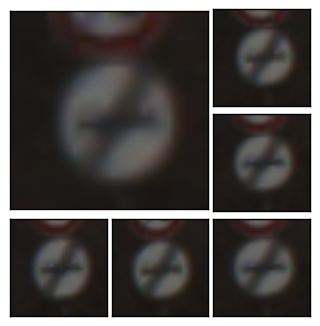

In [25]:
def showMosaic(dataSubset, image, cmap=None):
    lt = [ (3,3), [0,0], [0,2], [1,2], [2,2], [2, 1], [2, 0] ]
    #lt = [ (3,3), [0,0], [2, 1], [2, 0] ]
    count = 0
    gs1 = gridspec.GridSpec(lt[0][0],lt[0][1])
    gs1.update(left=0, right=0.5, hspace=0.05, wspace=0.05)
    flag = True
    
    for i in lt[1:]:

        if flag:
            ax = plt.subplot(gs1[0:2,0:2])            
            flag = False
        else:
            ax =  plt.subplot(gs1[i[0],i[1]])
        image = dataSubset[count]
        ax.imshow(image, cmap=cmap)
        ax.set_xticks([]); ax.set_yticks([])
        count += 1
        
if tRace3:showMosaic(X_train[:6], image)
if tRace1:print(msg1)

In [ ]:
def showImg(dataSet1,dataSet2,lt=[1,1],cmap='rgb'): #,figNum,tiTle='...',table2d=[5,9],lt=ltPub):
    mAx = len(dataSet)
    fig, axes = plt.subplots(lt[0],lt[1], figsize=(15,6))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    axes = axes.ravel()

    #for i, ax in enumerate(axes):
    for i in range(lt[0]*lt[1]):
        # Plot image.
        index = random.randint(0,mAx)
        image = dataSet[index]
        axes[i].imshow(image.reshape(img_shape), cmap=cmap)
        
        # Remove ticks from the plot.
        #axes.set_xticks([])
        #axes.set_yticks([])
        axes[i].axis('off')   
    #plt.show()

    
def visuTs(dataSet,table2d=[1,3]):
    # show table2d[0]*table2d[1] images from the training set
    fig0, ax0 = plt.subplots(table2d[0],table2d[1], figsize=(15,6))
    fig0.subplots_adjust(hspace=0.3, wspace=0.3)
    ax0 = ax0.ravel()

    for i in range(table2d[0]*table2d[1]):
        index = random.randint(0,len(dataSet))
        image = dataSet[index]
        ax0[i].imshow(image)
        ax0[i].axis('off')
        
visuTs(X_train)
print('...done')    
    
    
showImg(X_train, y_train)